In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import sklearn.preprocessing
import numpy as np

In [0]:
#define normalizers for training and testing datas of stocks
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
min_max_scaler_test_stock1 = sklearn.preprocessing.MinMaxScaler()
min_max_scaler_test_stock2 = sklearn.preprocessing.MinMaxScaler()
min_max_scaler_train_stock1 = sklearn.preprocessing.MinMaxScaler()
min_max_scaler_train_stock2 = sklearn.preprocessing.MinMaxScaler()

In [0]:
def normalize_data(df):
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

#function that transforms input stock histories of a list of sequences of fixed size
def load_data(real_data,stock, seq_len,flag):
    data_raw = stock.values # convert to numpy array
    data = []
    data_actual=[]
    data_actual_raw = real_data.values
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
        data_actual.append(data_actual_raw[index: index + seq_len])
    data = np.array(data);
    data_actual = np.array(data_actual)
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:-1,:]
    y_train = data_actual[:train_set_size,-1,:]
    #Use appropriate normalizations
    if(flag==1):
        y_train = min_max_scaler_train_stock1.fit_transform(y_train.reshape(-1,1))
    else:
        y_train = min_max_scaler_train_stock2.fit_transform(y_train.reshape(-1,1))
    x_test = data[train_set_size:,:-1,:]
    y_test = data_actual[train_set_size:,-1,:]
    if(flag==1):
        y_test = min_max_scaler_test_stock1.fit_transform(y_test.reshape(-1,1))
    else:
        y_test = min_max_scaler_test_stock2.fit_transform(y_test.reshape(-1,1))
    return [x_train, y_train, x_test, y_test]

In [0]:
#load data
import pandas as pd
df = pd.read_csv('data/toyota_final.csv')

In [0]:
print(len(df))

1762


In [0]:
#load data
dfg = pd.read_csv('data/gm_final.csv')

In [0]:
print(len(dfg))

1762


In [0]:
df1 = df[['Close']]
dfg1 = dfg[['Close']]

In [0]:
cols = list(dfg1.columns.values)
print('dfq.values = ', cols)

dfq.values =  ['Close']


In [0]:
#split into training and testing set
valid_set_size_percentage = 10
test_set_size_percentage = 10
df_stock_norm = df1.copy()
df_stock_norm = normalize_data(df_stock_norm)
df_stock_real = df1.copy()
# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_stock_real,df_stock_norm, seq_len,1)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1394, 19, 1)
y_train.shape =  (1394, 1)
x_test.shape =  (348, 19, 1)
y_test.shape =  (348, 1)


In [0]:
df_stock_norm1 = dfg1.copy()
df_stock_norm1 = normalize_data(df_stock_norm1)
# sequence length set to 20 (19 values + 20th day predicition)
seq_len = 20
df_stock_real1 = dfg1.copy()
x_train1, y_train1, x_test1, y_test1 = load_data(df_stock_real1,df_stock_norm1, seq_len,0)
print('x_train1.shape = ',x_train1.shape)
print('y_train1.shape = ', y_train1.shape)
# print('x_valid1.shape = ',x_valid1.shape)
# print('y_valid1.shape = ', y_valid1.shape)
print('x_test1.shape = ', x_test1.shape)
print('y_test1.shape = ',y_test1.shape)

x_train1.shape =  (1394, 19, 1)
y_train1.shape =  (1394, 1)
x_test1.shape =  (348, 19, 1)
y_test1.shape =  (348, 1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


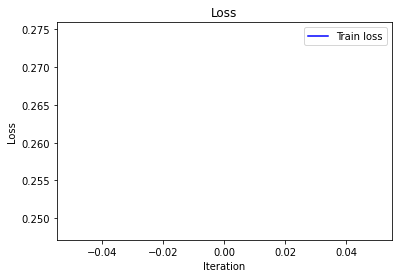

Iteration: 0, train loss: 0.2615


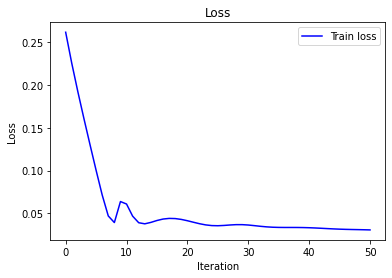

Iteration: 50, train loss: 0.0308


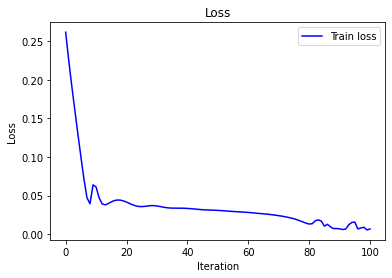

Iteration: 100, train loss: 0.0067


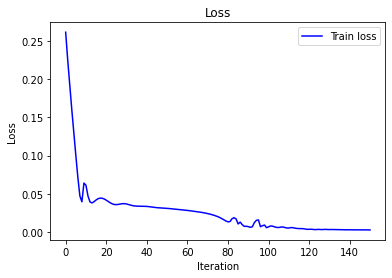

Iteration: 150, train loss: 0.0026


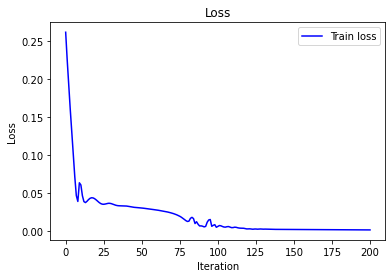

Iteration: 200, train loss: 0.0021


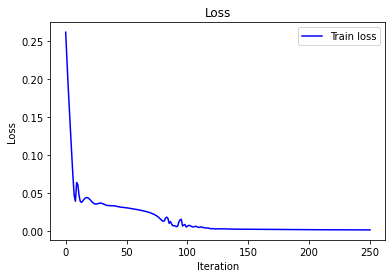

Iteration: 250, train loss: 0.0018


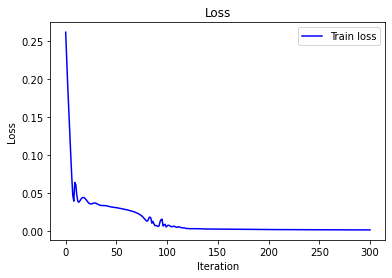

Iteration: 300, train loss: 0.0016


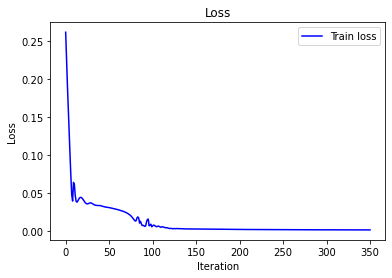

Iteration: 350, train loss: 0.0014


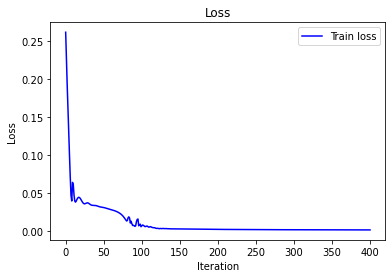

Iteration: 400, train loss: 0.0014


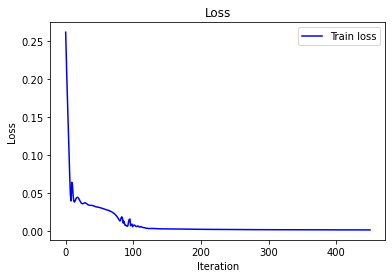

Iteration: 450, train loss: 0.0013


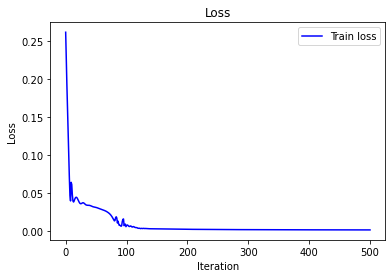

Iteration: 500, train loss: 0.0012


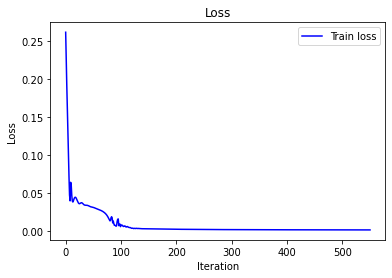

Iteration: 550, train loss: 0.0012


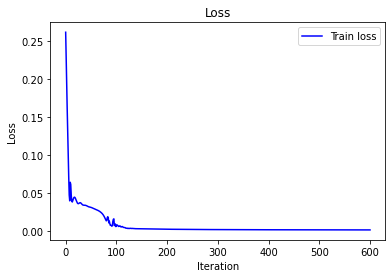

Iteration: 600, train loss: 0.0012


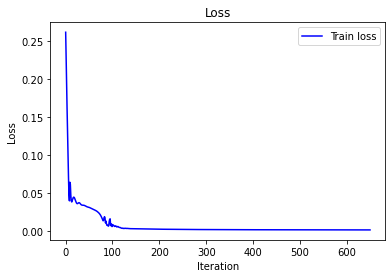

Iteration: 650, train loss: 0.0011


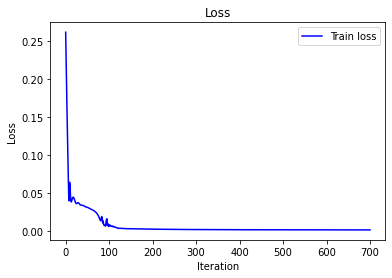

Iteration: 700, train loss: 0.0011


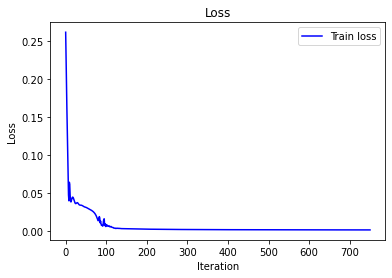

Iteration: 750, train loss: 0.0011


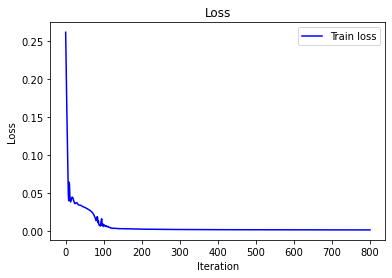

Iteration: 800, train loss: 0.0010


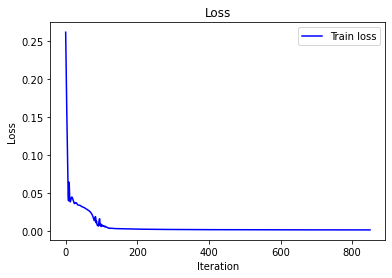

Iteration: 850, train loss: 0.0010


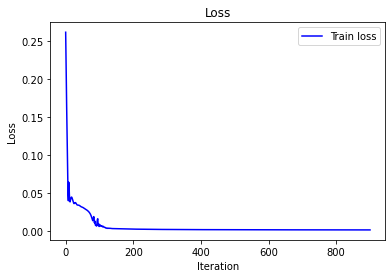

Iteration: 900, train loss: 0.0010


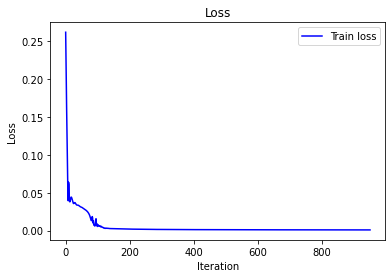

Iteration: 950, train loss: 0.0010


In [0]:
#%% (0) Important libraries
import tensorflow as tf
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from IPython import display


#%% (2) Model definition.
#Build Multitask learnning model
import tensorflow as tf

class GRU:
    
    def __init__(self, input_dimensions, hidden_size, dtype=tf.float64):
        self.input_dimensions = input_dimensions
        self.hidden_size = hidden_size
        
        # Weights for input vectors of shape (input_dimensions, hidden_size)
        self.Wr = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.01), name='Wr')
        self.Wz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.01), name='Wz')
        self.Wh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.01), name='Wh')
        
        # Weights for hidden vectors of shape (hidden_size, hidden_size)
        self.Ur = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.01), name='Ur')
        self.Uz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.01), name='Uz')
        self.Uh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.01), name='Uh')
        
        # Biases for hidden vectors of shape (hidden_size,)
        self.br = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.01), name='br')
        self.bz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.01), name='bz')
        self.bh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='bh')
        
        # Define the input layer placeholder
        self.input_layer = tf.placeholder(dtype=tf.float64, shape=(None, None, input_dimensions), name='input')
        
        # Put the time-dimension upfront for the scan operator
        self.x_t = tf.transpose(self.input_layer, [1, 0, 2], name='x_t')
        
        # A little hack (to obtain the same shape as the input matrix) to define the initial hidden state h_0
        self.h_0 = tf.matmul(self.x_t[0, :, :], tf.zeros(dtype=tf.float64, shape=(input_dimensions, hidden_size)), name='h_0')
        
        # Perform the scan operator
        self.h_t_transposed = tf.scan(self.forward_pass, self.x_t, initializer=self.h_0, name='h_t_transposed')
        
        # Transpose the result back
        self.h_t = tf.transpose(self.h_t_transposed, [1, 0, 2], name='h_t')

    def forward_pass(self, h_tm1, x_t):
        """Perform a forward pass.
        
        Arguments
        ---------
        h_tm1: np.matrix
            The hidden state at the previous timestep (h_{t-1}).
        x_t: np.matrix
            The input vector.
        """
        # Definitions of z_t and r_t
        z_t = tf.sigmoid(tf.matmul(x_t, self.Wz) + tf.matmul(h_tm1, self.Uz) + self.bz)
        r_t = tf.sigmoid(tf.matmul(x_t, self.Wr) + tf.matmul(h_tm1, self.Ur) + self.br)
        
        # Definition of h~_t
        h_proposal = tf.tanh(tf.matmul(x_t, self.Wh) + tf.matmul(tf.multiply(r_t, h_tm1), self.Uh) + self.bh)
        
        # Compute the next hidden state
        h_t = tf.multiply(1 - z_t, h_tm1) + tf.multiply(z_t, h_proposal)
        
        return h_t
    
#%% (3) Initialize and train the model.

# The input has 2 dimensions: dimension 0 is reserved for the first term and dimension 1 is reverved for the second term
input_dimensions = 1
batch_size =185
time_size = 20
# Arbitrary number for the size of the hidden state
hidden_size = 256

# Initialize a session
session = tf.Session()

# Create a new instance of the GRU model
gru = GRU(input_dimensions, hidden_size)
gru1 = GRU(input_dimensions,hidden_size)

# Add an additional layer on top of each of the hidden state outputs
W_output = tf.Variable(tf.truncated_normal(dtype=tf.float64, shape=(256, 1), mean=0, stddev=0.01))
b_output = tf.Variable(tf.truncated_normal(dtype=tf.float64, shape=(1,), mean=0, stddev=0.01))
output = tf.map_fn(lambda h_t: tf.matmul(h_t, W_output) + b_output, gru.h_t)
output = tf.transpose(output,[1,0,2])

W_output1 = tf.Variable(tf.truncated_normal(dtype=tf.float64, shape=(256, 1), mean=0, stddev=0.01))
b_output1 = tf.Variable(tf.truncated_normal(dtype=tf.float64, shape=(1,), mean=0, stddev=0.01))
output1 = tf.map_fn(lambda h_t: tf.matmul(h_t, W_output1) + b_output1, gru1.h_t)
output1 = tf.transpose(output1,[1,0,2])
# output = tf.linalg.normalize(output)
# output1 = tf.linalg.normalize(output1)
# Create a placeholder for the expected output
expected_output = tf.placeholder(dtype=tf.float64, shape=(None,1), name='expected_output')
expected_output1 = tf.placeholder(dtype=tf.float64, shape=(None,1), name='expected_output')
size = tf.placeholder(dtype=tf.float64,name='size')
v =  expected_output - output[-1]
v1 =  expected_output1 - output1[-1]
# Just use quadratic loss
loss = tf.reduce_sum(0.5 * tf.pow(v, 2)) /size + tf.reduce_sum(0.5 * tf.pow(v1, 2)) / size
lossOnly = tf.reduce_sum(0.5 * tf.pow(v, 2)) /size


# Use the Adam optimizer for training
train_step = tf.train.AdamOptimizer().minimize(loss)

# Initialize all the variables
init_variables = tf.global_variables_initializer()
session.run(init_variables)

# Initialize the losses
train_losses = []
validation_losses = []

# Perform all the iterations
for epoch in range(1000):
    # Compute the losses
    output_train1,output_train2,_, train_loss = session.run([output,output1,train_step, loss], feed_dict={gru.input_layer: x_train,gru1.input_layer:x_train1, expected_output: y_train,expected_output1:y_train1,size:x_train.shape[0]})
    
    # Log the losses
    train_losses += [train_loss]
    # validation_losses += [validation_loss]
    
    # Display an update every 50 iterations
    if epoch % 50 == 0:
        plt.plot(train_losses, '-b', label='Train loss')
        # plt.plot(validation_losses, '-r', label='Validation loss')
        plt.legend(loc=0)
        plt.title('Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()
        print('Iteration: %d, train loss: %.4f' % (epoch, train_loss))


In [0]:
pred_test1,pred_test2 = session.run([output,output1], feed_dict={gru.input_layer: x_test,gru1.input_layer:x_test1,size:x_test.shape[0]})

In [0]:
toyata_pred = min_max_scaler_test_stock1.inverse_transform(pred_test1[-1])

In [0]:
toyata_original = min_max_scaler_test_stock1.inverse_transform(y_test)

In [0]:
for i in range(0,len(y_test)):
  print("Predicted ",toyata_pred[i])
  print("Real ",toyata_original[i])

In [0]:
gm_pred = min_max_scaler_test_stock2.inverse_transform(pred_test2[-1])

In [0]:
gm_original = min_max_scaler_test_stock2.inverse_transform(y_test1)

In [0]:
for i in range(0,len(y_test)):
  print("Predicted ",gm_pred[i])
  print("Real ",gm_original[i])

In [0]:
#calculate relative accuracy, amount of match lies between 0 and 1 with 1 being perfect match
def calulate_accuracy(real,predicted):
  real = np.array(real)+1
  predicted = np.array(predicted)+1
  percentage = 1 - np.sqrt(np.mean(np.square((real - predicted) / predicted)))
  return percentage
accuracy = calulate_accuracy(gm_original,gm_pred)

In [0]:
calulate_accuracy(toyata_original,toyata_pred)

0.9477541655942832

In [0]:
calulate_accuracy(gm_original,gm_pred)

0.9615423769629785

In [0]:
#Plot predicted vs expected values of stocks for visualization

In [0]:
timeline = range(len(y_test))

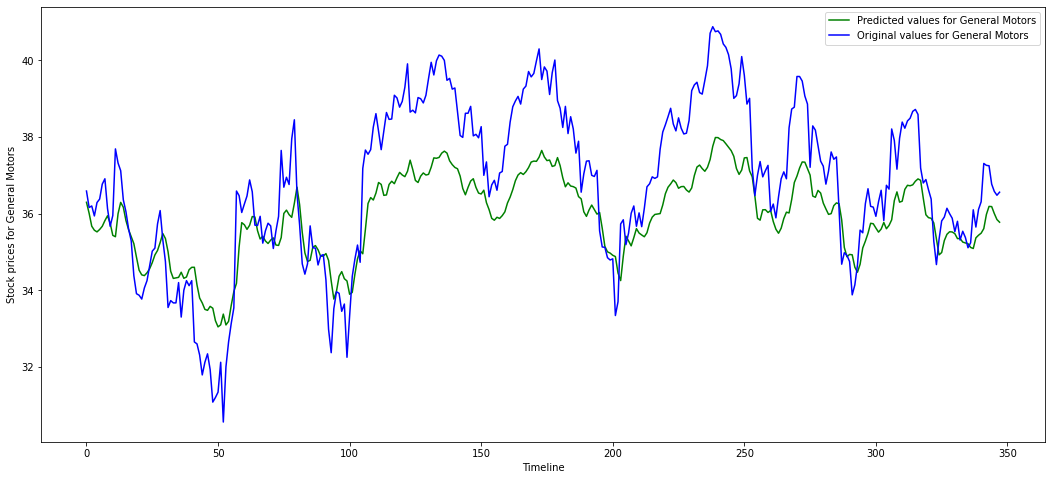

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(18,8))
plt.plot(timeline,gm_pred,color='green',label="Predicted values for General Motors")
plt.plot(timeline,gm_original,color='blue',label='Original values for General Motors')
plt.xlabel("Timeline")
plt.ylabel("Stock prices for General Motors")
plt.legend()
plt.show()

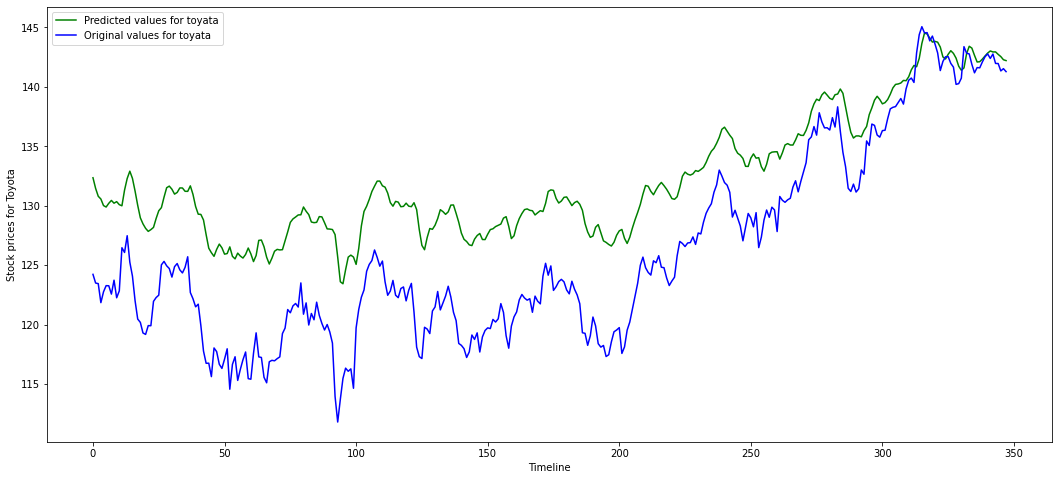

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(18,8))
plt.plot(timeline,toyata_pred,color='green',label="Predicted values for toyata")
plt.plot(timeline,toyata_original,color='blue',label='Original values for toyata')
plt.xlabel("Timeline")
plt.ylabel("Stock prices for Toyota")
plt.legend()
plt.show()

In [0]:
#Calculate performance metrics such a mse,rmse,mae for the testing data

In [0]:
mse = (np.square(toyata_pred-toyata_original)).mean(axis=0)

In [0]:
mse

array([46.14718309])

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(toyata_original,toyata_pred)

6.118691910998656

In [0]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(toyata_pred,toyata_original))

print(rmse)

6.793171799269226


In [0]:
mse = (np.square(gm_pred-gm_original)).mean(axis=0)

In [0]:
mse

array([2.07705274])

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(gm_original,gm_pred)

1.200132593504652

In [0]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(gm_pred,gm_original))

print(rmse)

1.4411983709526006
